In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("WHO-COVID-19-global-data.csv")
df.loc[36000:37600,:]


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
36000,2021-11-17,BW,Botswana,AFRO,0,194445,0,2416
36001,2021-11-18,BW,Botswana,AFRO,0,194445,0,2416
36002,2021-11-19,BW,Botswana,AFRO,0,194445,0,2416
36003,2021-11-20,BW,Botswana,AFRO,207,194652,0,2416
36004,2021-11-21,BW,Botswana,AFRO,0,194652,0,2416
...,...,...,...,...,...,...,...,...
37596,2022-09-01,BR,Brazil,AMRO,16806,34414011,229,683851
37597,2022-09-02,BR,Brazil,AMRO,15842,34429853,114,683965
37598,2022-09-03,BR,Brazil,AMRO,14821,34444674,182,684147
37599,2022-09-04,BR,Brazil,AMRO,11471,34456145,115,684262


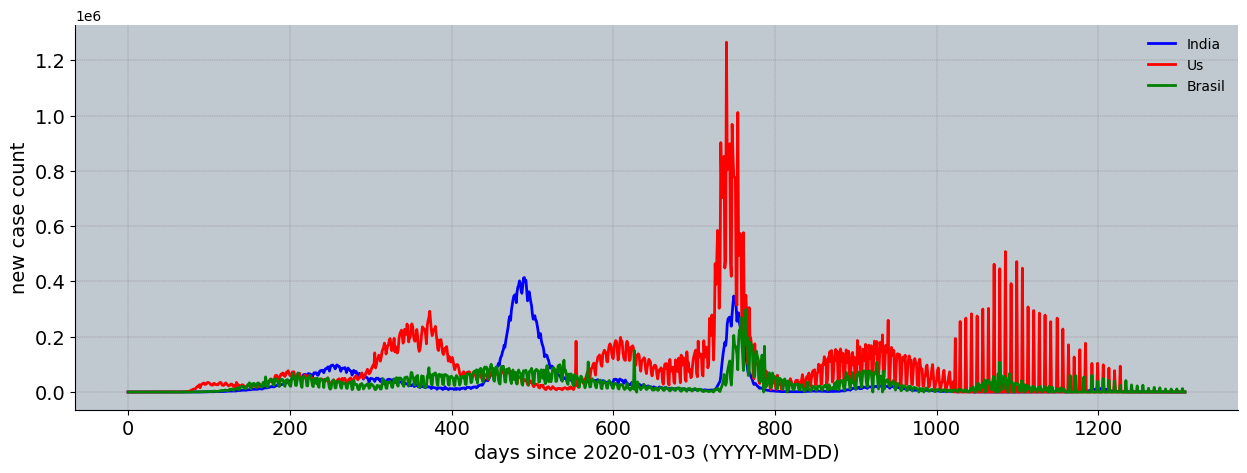

In [3]:
fig,ax=plt.subplots(figsize=[15,5])
new_cases_india=df[df['Country']=='India'].New_cases
new_cases_US=df[df['Country']=='United States of America'].New_cases
new_cases_brasil=df[df['Country']=='Brazil'].New_cases
days_India=df[df['Country']=='India'].index-df[df['Country']=='India'].index[0]
days_us=df[df['Country']=='United States of America'].index-df[df['Country']=='United States of America'].index[0]
days_brasil=df[df['Country']=='Brazil'].index-df[df['Country']=='Brazil'].index[0]
ax.plot(days_India,new_cases_india,label='India',linestyle='-',linewidth=2,color='blue')
ax.plot(days_us,new_cases_US,label='Us',linestyle='-',linewidth=2,color='red')
ax.plot(days_brasil,new_cases_brasil,label='Brasil',linestyle='-',linewidth=2,color='green')
ax.set_xlabel('days since 2020-01-03 (YYYY-MM-DD)',fontsize=14)
ax.set_ylabel('new case count',fontsize=14)
# plt.colorbar().set_label('Color Variable')
ax.spines[['right','top']].set_color('none')
ax.grid(color='gray',linestyle='--',linewidth=.3,alpha=1)
ax.tick_params(which='both',labelsize=14)
ax.set_facecolor((0.2,0.3,0.4,0.3))
ax.legend(loc='upper right',frameon=False,ncol=1)
# ax.text(50,)
plt.show()


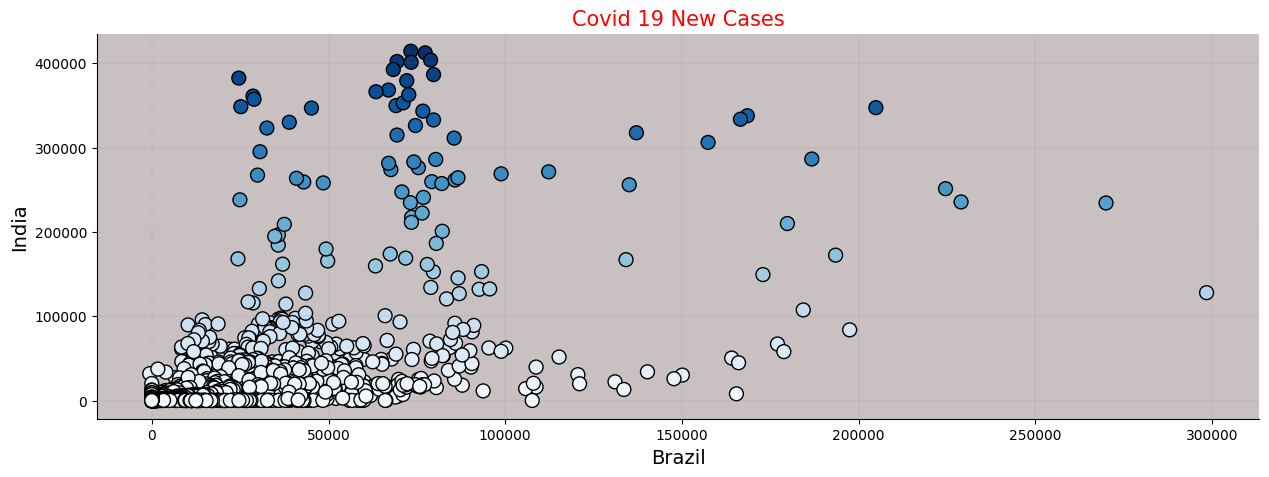

In [18]:
fig,ax=plt.subplots(figsize=[15,5])
New_cases_India=df[df['Country']=='India'].New_cases
New_cases_brasil=df[df['Country']=='Brazil'].New_cases
ax.scatter(New_cases_brasil,New_cases_India,c=New_cases_India,cmap='Blues',marker='o',s=100,edgecolors='black')
ax.grid(color='grey',linestyle='--',linewidth=.3,alpha=0.5)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.set_xlabel('Brazil',fontsize=14)
ax.set_ylabel('India',fontsize=14)
ax.set_facecolor((0.3,0.2,0.2,0.3))
ax.set_title("Covid 19 New Cases",fontsize=15,color="r")
plt.show()

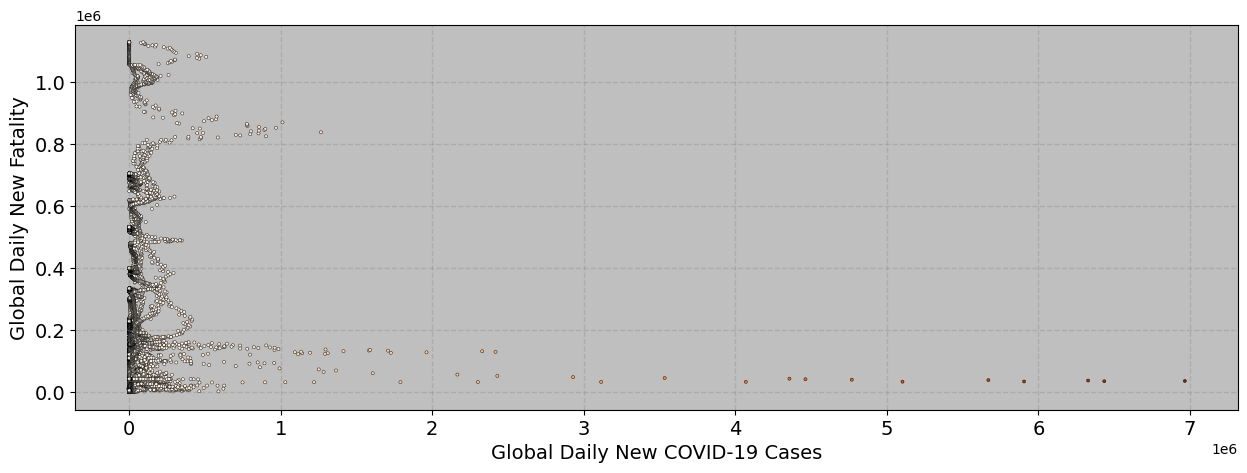

In [8]:
new_cases=df.New_cases
cummulative_deaths=df.Cumulative_deaths
fig,ax=plt.subplots(figsize=[15,5])
ax.scatter(new_cases,cummulative_deaths,c=new_cases,cmap='Oranges',linewidths=0.3,edgecolors='Black',s=5)
ax.set_xlabel('Global Daily New COVID-19 Cases',fontsize=14)
ax.set_ylabel('Global Daily New Fatality',fontsize=14)
ax.tick_params(which='both',labelsize=14)
ax.grid(linestyle='--',color='grey',linewidth=1,alpha=0.3)
ax.set_facecolor((0.5,0.5,0.5,0.5))
plt.show()


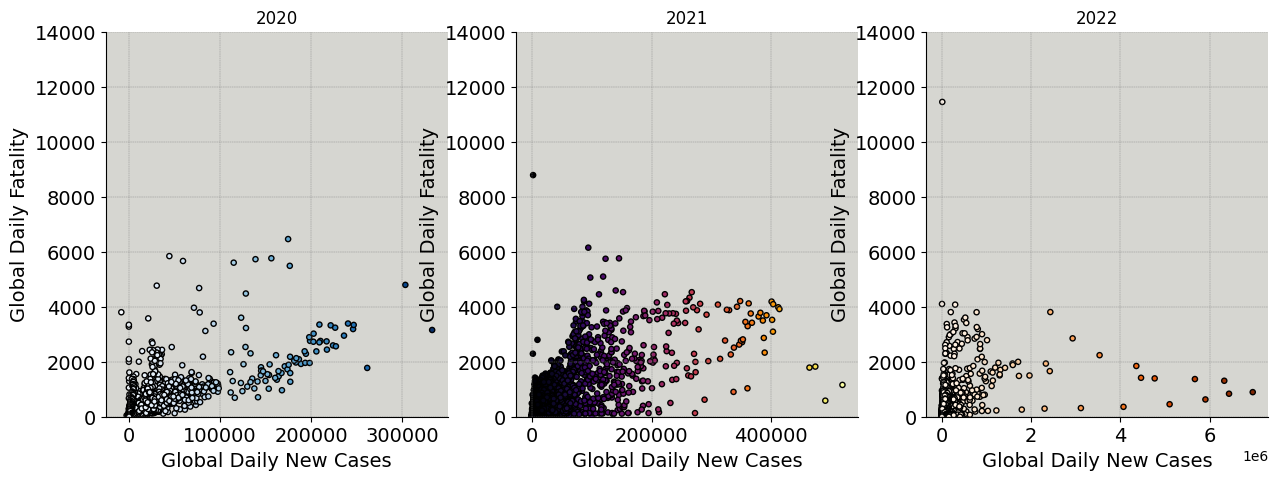

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=[15,5])
years=[2020,2021,2022]
line_colors=['Blues','inferno','Oranges']
new_cases={}
death_cases={}
for index,year in enumerate (years):
    new_cases[index]=df.loc[df['Date_reported'].str.contains(str(year),regex=True)].New_cases
    death_cases[index]=df.loc[df['Date_reported'].str.contains(str(year),regex=True)].New_deaths
    ax[index].scatter(new_cases[index],death_cases[index],c=new_cases[index],cmap=line_colors[index],label=str(year),marker='o',s=14,edgecolor='Black')
    ax[index].grid(linewidth=0.3,linestyle='--',color='grey')
    ax[index].set_facecolor((0.2,0.2,0.1,0.2))
    ax[index].set_xlabel('Global Daily New Cases',fontsize=14)
    ax[index].set_ylabel('Global Daily Fatality',fontsize=14)
    ax[index].tick_params(which='both',labelsize=14)
    ax[index].spines['right'].set_color('none')
    ax[index].spines['top'].set_color('none')
    ax[index].set_title(year)
    ax[index].set_ylim([0,14000])